In [6]:
# Import Dataset
import pandas as pd 
data = pd.read_csv('../dataset/data.csv')
data

,MQ2,MQ6,MQ7,MQ9,target
0,1.210000,5.080000,0.010000,4.740000,0
1,1.810000,5.380000,0.170000,5.640000,0
2,1.150000,4.730000,0.010000,0.890000,0
3,1.440000,3.640000,0.010000,3.990000,0
4,4.910000,0.890000,0.000000,1.510000,0
...,...,...,...,...,...
23995,20.960000,38.610000,0.030000,0.620000,3
23996,24.834189,43.240000,0.760000,12.520000,3
23997,8.763730,47.740000,0.103432,0.690000,3
23998,7.926874,45.689553,0.034926,6.023275,3


In [7]:
# Deklarasi vektor fitur dan variabel target
X = data.drop('target',axis=1)
Y = data['target']

In [8]:
# Split Data menjadi Training Set dan Test Set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, Y, stratify=Y, test_size = 0.3, random_state = 42)

In [9]:
# Feature Scaling
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

### SVM

Report: 
               precision    recall  f1-score   support

           0  1.00000000 0.93888889 0.96848138      1440
           1  0.93337865 0.95347222 0.94331845      1440
           2  0.95267072 0.97847222 0.96539911      1440
           3  0.96899225 0.95486111 0.96187478      1440
           4  0.95807978 0.98402778 0.97088044      1440

    accuracy                      0.96194444      7200
   macro avg  0.96262428 0.96194444 0.96199083      7200
weighted avg  0.96262428 0.96194444 0.96199083      7200

Accuracy: 96.194444%
f1_score: 96.199083%
recall_score: 96.194444%
precision_score: 96.262428%


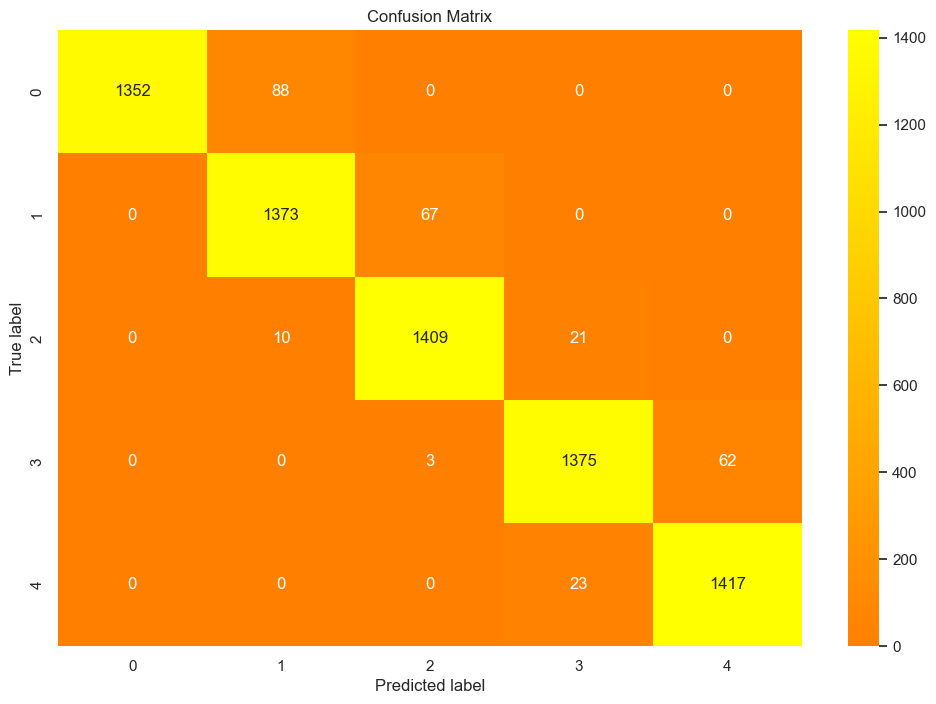

In [10]:
# Mengaplikasikan Model SVM 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
svc = SVC() 

svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

print("Report: \n", classification_report(y_test,y_pred,digits=8))

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy*100:.6f}%')
print(f'f1_score: {f1*100:.6f}%')
print(f'recall_score: {recall*100:.6f}%')
print(f'precision_score: {precision*100:.6f}%')

def draw_confusion_matrix(cm):
    plt.figure(figsize=(12,8))
    sns.heatmap(cm,annot=True,fmt="d", center=0, cmap='autumn') 
    plt.title("Confusion Matrix")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

cm_rf = confusion_matrix(y_test, y_pred)
draw_confusion_matrix(cm_rf)

Report: 
               precision    recall  f1-score   support

           0  1.00000000 0.93750000 0.96774194      1440
           1  0.93667363 0.93472222 0.93569691      1440
           2  0.93803560 0.98819444 0.96246195      1440
           3  0.98360656 1.00000000 0.99173554      1440
           4  1.00000000 0.99444444 0.99721448      1440

    accuracy                      0.97097222      7200
   macro avg  0.97166316 0.97097222 0.97097016      7200
weighted avg  0.97166316 0.97097222 0.97097016      7200

Accuracy: 97.097222%
f1_score: 97.097016%
recall_score: 97.097222%
precision_score: 97.166316%


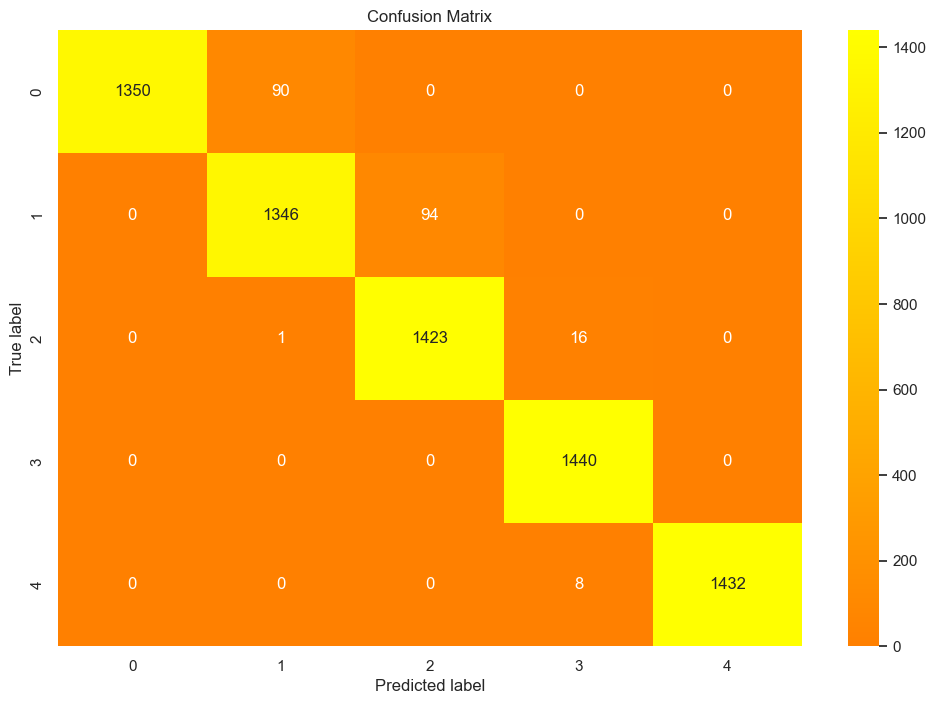

In [11]:
# Mengaplikasikan Model SVM Menggunakan Linear Kernel function 
linear_classifier=SVC(kernel='linear').fit(X_train,y_train)
y_pred_kernel = linear_classifier.predict(X_test)

print("Report: \n", classification_report(y_test,y_pred_kernel,digits=8))

accuracy = accuracy_score(y_test, y_pred_kernel)
f1 = f1_score(y_test, y_pred_kernel, average='weighted')
recall = recall_score(y_test, y_pred_kernel, average='weighted')
precision = precision_score(y_test, y_pred_kernel, average='weighted')

print(f'Accuracy: {accuracy*100:.6f}%')
print(f'f1_score: {f1*100:.6f}%')
print(f'recall_score: {recall*100:.6f}%')
print(f'precision_score: {precision*100:.6f}%')

cm_rf = confusion_matrix(y_test, y_pred_kernel)
draw_confusion_matrix(cm_rf)

### MLP

/Users/amarudinzaidan/.virtualenvs/project/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Report: 
               precision    recall  f1-score   support

           0  1.00000000 0.94791667 0.97326203      1440
           1  0.94688385 0.92847222 0.93758766      1440
           2  0.92964169 0.99097222 0.95932773      1440
           3  0.98148148 0.99375000 0.98757764      1440
           4  0.99720280 0.99027778 0.99372822      1440

    accuracy                      0.97027778      7200
   macro avg  0.97104197 0.97027778 0.97029666      7200
weighted avg  0.97104197 0.97027778 0.97029666      7200

Accuracy: 97.027778%
f1_score: 97.029666%
recall_score: 97.027778%
precision_score: 97.104197%


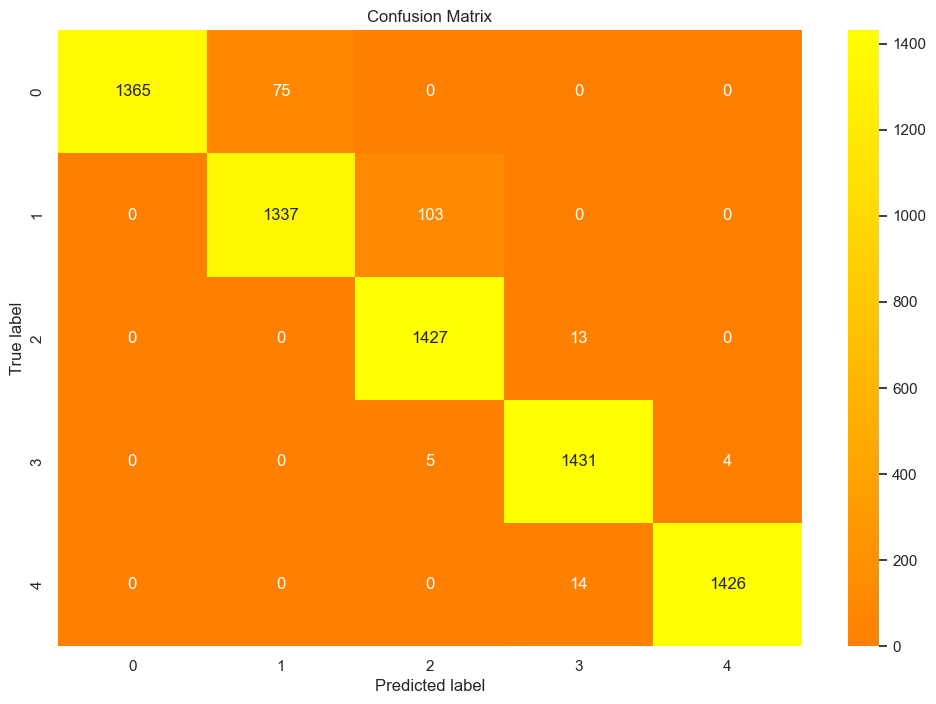

In [12]:
# Mengaplikasikan non-validated model MLP

from sklearn.neural_network import MLPClassifier 
mlpc = MLPClassifier(random_state = 0)
mlpc.fit(X_train, y_train)
y_pred = mlpc.predict(X_test) 

print("Report: \n", classification_report(y_test,y_pred,digits=8))

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy*100:.6f}%')
print(f'f1_score: {f1*100:.6f}%')
print(f'recall_score: {recall*100:.6f}%')
print(f'precision_score: {precision*100:.6f}%')

cm_rf = confusion_matrix(y_test, y_pred)
draw_confusion_matrix(cm_rf)

MLPClassifier(hidden_layer_sizes=(100, 100), random_state=42)
Report: 
               precision    recall  f1-score   support

           0  1.00000000 0.90486111 0.95005468      1440
           1  0.90610007 0.91805556 0.91203863      1440
           2  0.92277742 0.98750000 0.95404227      1440
           3  0.98350515 0.99375000 0.98860104      1440
           4  0.99445215 0.99583333 0.99514226      1440

    accuracy                      0.96000000      7200
   macro avg  0.96136696 0.96000000 0.95997578      7200
weighted avg  0.96136696 0.96000000 0.95997578      7200

Accuracy: 96.000000%
f1_score: 95.997578%
recall_score: 96.000000%
precision_score: 96.136696%


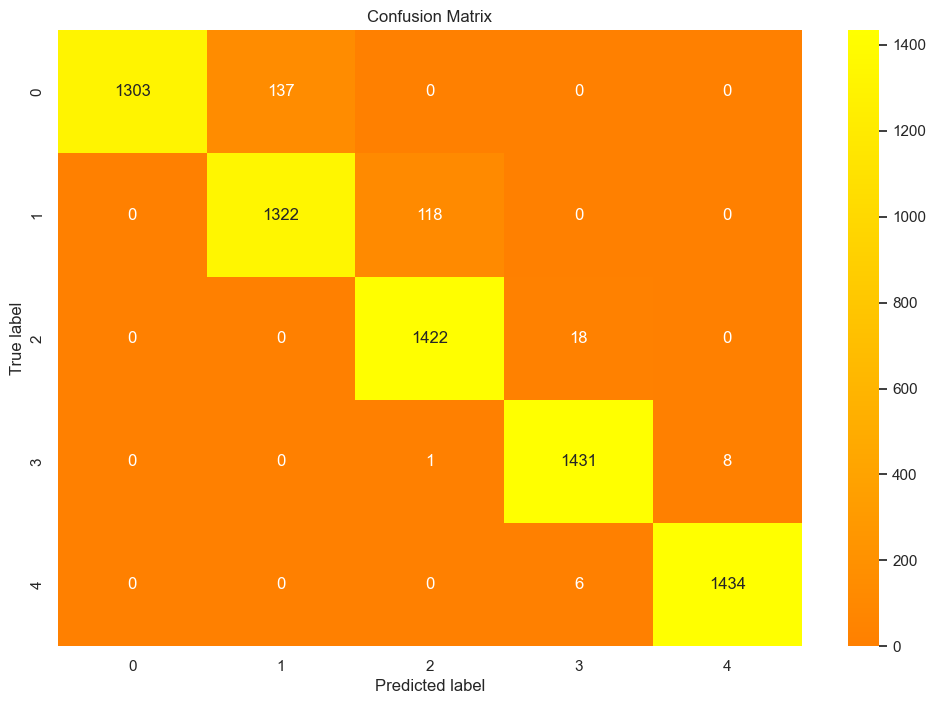

In [13]:
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 100), activation='relu', random_state=42)
print(mlp_classifier)
mlp_classifier.fit(X_train,y_train)

predictions_mlp = mlp_classifier.predict(X_test)

print("Report: \n", classification_report(y_test,predictions_mlp ,digits=8))

accuracy = accuracy_score(y_test, predictions_mlp )
f1 = f1_score(y_test, predictions_mlp, average='weighted')
recall = recall_score(y_test, predictions_mlp , average='weighted')
precision = precision_score(y_test, predictions_mlp, average='weighted')

print(f'Accuracy: {accuracy*100:.6f}%')
print(f'f1_score: {f1*100:.6f}%')
print(f'recall_score: {recall*100:.6f}%')
print(f'precision_score: {precision*100:.6f}%')

cm_rf = confusion_matrix(y_test, predictions_mlp)
draw_confusion_matrix(cm_rf)